# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle, os

# TODO: Fill this in based on where you saved the training and testing data

training_file =   os.path.join(os.getcwd(), './train.p')
validation_file = os.path.join(os.getcwd(), './valid.p')
testing_file =    os.path.join(os.getcwd(), './test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import numpy as np
from sklearn.utils import shuffle
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

## Complete
1. Rotation
2. Grayscale (Not useful)
3. Histogram equalization (enhance contrast)
4. Contrast limited adaptive histogram equalization image contrast
5. Conorm (enhance edge with difference of gaussian)


## Grayscale
Grayscale was not found to be useful because color contains information in traffic signs.

In [ ]:
# Grayscale is not a useful preprocessing step as color contains information in traffic signs
# Create array with same shape as X_train without channels
# X_train_gray = np.copy(X_train[:,:,:,0])
# # Convert images to grayscale
# for i in range(n_train):
#     X_train_gray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
# print('Datashape changed from {0} to {1}'.format(X_train.shape, 
#                                                  X_train_gray.shape))

## Rotation +/- 5 degrees
* Traffic signs may not be oriented the same as in the training images.
* Images show greater rotation for visual clarity, smaller angles expected in real world

In [3]:
# Define rotation matrix and rotate in positive and negative direction
def rotate_images(X, deg):
    rows, cols = X.shape[1], X.shape[2]
    M_pos = cv2.getRotationMatrix2D((rows//2, cols//2), deg, 1)
    M_neg = cv2.getRotationMatrix2D((rows//2, cols//2), -1*deg, 1)
    X_rot_pos = np.copy(X)
    X_rot_neg = np.copy(X)
    for i in range(X.shape[0]):
        X_rot_pos[i] = cv2.warpAffine(X[i], M_pos, (rows, cols))
        X_rot_neg[i] = cv2.warpAffine(X[i], M_neg, (rows, cols))
    print('Dataset rotated +/-{0} degrees.'.format(deg))
    return X_rot_pos, X_rot_neg

Dataset rotated +/-15 degrees.


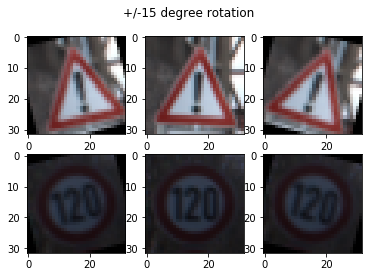

In [4]:
degrees = 15
X_pos, X_neg = rotate_images(X_train, degrees)
X_train, X_pos, X_neg = shuffle(X_train, X_pos, X_neg)
fig = plt.figure()
fig.suptitle('+/-{0} degree rotation'.format(degrees))
plt.subplot(231)
plt.imshow(X_pos[0])
plt.subplot(232)
plt.imshow(X_train[0])
plt.subplot(233)
plt.imshow(X_neg[0])
plt.subplot(234)
plt.imshow(X_pos[1])
plt.subplot(235)
plt.imshow(X_train[1])
plt.subplot(236)
plt.imshow(X_neg[1])
plt.show()

## Increase image contrast
* Histogram equalization is used to increase contrast in image
* Color historgram equalization achieved by equalizing Y channel of YCrCb colorspace

In [5]:
def amplify_contrast(X):
    X_eq = np.copy(X)
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        Y_eq = cv2.equalizeHist(Y)
        YCrCb_eq = cv2.merge((Y_eq, Cr, Cb))
        X_eq[i] = cv2.cvtColor(YCrCb_eq, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized')
    return X_eq

Dataset histogram equalized


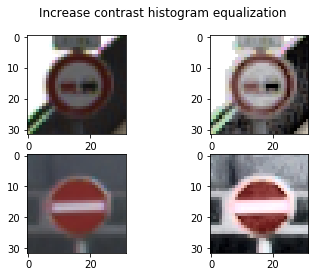

In [6]:
X_histeq = amplify_contrast(X_train)
X_train, X_histeq = shuffle(X_train, X_histeq)
fig = plt.figure()
fig.suptitle('Increase contrast histogram equalization')
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_histeq[0])
plt.subplot(223)
plt.imshow(X_train[1])
plt.subplot(224)
plt.imshow(X_histeq[1])
plt.show()

## Increase image contrast (Area)
* Adaptive contrast limited histogram equalization is used to increase contrast in image
* Different from histogram equalization in that it looks at blocks of pixels.
* Color historgram equalization achieved by equalizing Y channel of YCrCb colorspace

In [7]:
def clahe_contrast(X):
    X_clahe = np.copy(X)
    for i in range(X.shape[0]):
        YCrCb = cv2.cvtColor(X[i], cv2.COLOR_RGB2YCrCb)
        Y, Cr, Cb = cv2.split(YCrCb)
        clahe = cv2.createCLAHE(tileGridSize=(4,4))
        Y_clahe = clahe.apply(Y)
        YCrCb_clahe = cv2.merge((Y_clahe, Cr, Cb))
        X_clahe[i] = cv2.cvtColor(YCrCb_clahe, cv2.COLOR_YCrCb2RGB)
    print('Dataset histogram equalized clahe')
    return X_clahe

Dataset histogram equalized clahe


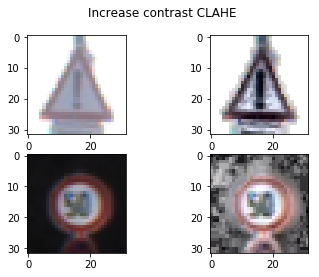

In [8]:
X_clahe = clahe_contrast(X_train)
X_train, X_clahe = shuffle(X_train, X_clahe)
fig = plt.figure()
fig.suptitle('Increase contrast CLAHE')
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_clahe[0])
plt.subplot(223)
plt.imshow(X_train[1])
plt.subplot(224)
plt.imshow(X_clahe[1])
plt.show()

## Contrast Normalization
* Use a difference of gaussian to amplify edges
* Obtained by convolving a difference of gaussians on the image and adding that to the image
* Based on [Sermanet Lecun 2011](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)
* Can lead to artifacts in color images

In [9]:
def contrast_normalization(X):
    X_conorm = np.copy(X)
    for i in range(X.shape[0]):
        gauss_1 = cv2.getGaussianKernel(5, 1) + np.transpose(cv2.getGaussianKernel(5, 1))
        gauss_2 = cv2.getGaussianKernel(5, 1.6) + np.transpose(cv2.getGaussianKernel(5, 1.6))
        diff_gauss = gauss_1 - gauss_2
#         gauss_1 = cv2.GaussianBlur(X[i], (3,3), 0)
#         gauss_2 = cv2.GaussianBlur(X[i], (1,1), 0)
        X_conorm[i] = X[i] + cv2.filter2D(X[i], -1, diff_gauss)
#         X_conorm[i] = X[i] + (gauss_2 - gauss_1)
    print('Contrast normalized')
    return X_conorm

Contrast normalized


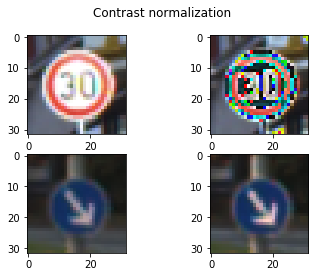

In [10]:
X_conorm = contrast_normalization(X_train)
X_train, X_conorm = shuffle(X_train, X_conorm)
fig = plt.figure()
fig.suptitle('Contrast normalization')
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_conorm[0])
plt.subplot(223)
plt.imshow(X_train[1])
plt.subplot(224)
plt.imshow(X_conorm[1])
plt.show()

### Preprocess Images

In [11]:
def preprocess_images(X, y):
    X_rot_pos, X_rot_neg = rotate_images(X, 5)
    X = np.concatenate((X, X_rot_neg, X_rot_pos), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    print('Number of examples increased to {0}'.format(X.shape[0]))
    
    X_histeq = amplify_contrast(X)
    X_clahe = clahe_contrast(X)
#     X_conorm = contrast_normalization(X)
    X = np.concatenate((X, X_histeq, X_clahe), axis=0)
    y = np.concatenate((y, y, y), axis=0)
    print('Number of examples increased to {0}'.format(X.shape[0]))
    return X, y


In [12]:
X_train, y_train = preprocess_images(X_train, y_train)

Dataset rotated +/-5 degrees.
Number of examples increased to 104397
Dataset histogram equalized
Dataset histogram equalized clahe
Number of examples increased to 313191


### Model Architecture

In [13]:
import tensorflow as tf
print(tf.__version__)

1.0.0


In [14]:
def weight_variable(shape):
    init = tf.truncated_normal(shape, mean=0, stddev=0.1)
    return tf.Variable(init)
def bias_variable(shape):
    init = tf.constant(0.1, shape=shape)
    return tf.Variable(init)

In [15]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='VALID')
def conv2d_same(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1], 
                          padding='VALID')

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def SketchNet(input_layer, dropout, num_classes=43):
    
#     depth = [1, 6, 16, 400, 160, 96, num_classes]
    input_layer = tf.reshape(x, [-1,32,32,3])
    print('Layer 0 Init: Shape {}'.format(input_layer.get_shape()))
    
    F_w_1 = weight_variable([5,5,3,18])
    F_b_1 = bias_variable([18])
    conv_1 = tf.nn.relu(conv2d(input_layer, F_w_1) + F_b_1)
    print('Layer 1 Convolution: Shape {}'.format(conv_1.get_shape()))
    pool_1 = max_pool(conv_1)
    print('Layer 2 Pooling: Shape {}'.format(pool_1.get_shape()))
    
    F_w_2 = weight_variable([5,5,18,48])
    F_b_2 = bias_variable([48])
    conv_2 = tf.nn.relu(conv2d(pool_1, F_w_2) + F_b_2)
    print('Layer 3 Convolution: Shape {}'.format(conv_2.get_shape()))
    pool_2 = max_pool(conv_2)
    print('Layer 4 Pooling: Shape {}'.format(pool_2.get_shape()))
    
    dense_1 = tf.contrib.layers.flatten(pool_2)
    print('Layer 5 Flatten: Shape {}'.format(dense_1.get_shape()))
    
    drop_1 = tf.nn.dropout(dense_1, dropout)
    
    F_w_3 = weight_variable([1200, 360])
    F_b_3 = bias_variable([360])
    dense_2 = tf.nn.relu(tf.matmul(drop_1, F_w_3) + F_b_3)
    print('Layer 6 Matrix Multiplication: Shape {}'.format(dense_2.get_shape()))
    
    F_w_4 = weight_variable([360, 108])
    F_b_4 = bias_variable([108])
    dense_3 = tf.nn.relu(tf.matmul(dense_2, F_w_4) + F_b_4)
    print('Layer 6 Matrix Multiplication: Shape {}'.format(dense_3.get_shape()))
    
    F_w_5 = weight_variable([108, n_classes])
    F_b_5 = bias_variable([n_classes])
    logits = tf.nn.relu(tf.matmul(dense_3, F_w_5) + F_b_5)
    print('Final Layer Matrix Multiplication: Shape {}'.format(logits.get_shape()))
    
    return logits

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def SketchNet2(input_layer, dropout, num_classes=43):
    
#     depth = [1, 6, 16, 400, 160, 96, num_classes]
    input_layer = tf.reshape(x, [-1,32,32,3])
    print('Layer 0 Init: Shape {}'.format(input_layer.get_shape()))
    
    F_w_1 = weight_variable([3,3,3,18])
    F_b_1 = bias_variable([18])
    conv_1 = tf.nn.relu(conv2d_same(input_layer, F_w_1) + F_b_1)
    print('Layer 1 Convolution: Shape {}'.format(conv_1.get_shape()))
    pool_1 = max_pool(conv_1)
    print('Layer 2 Pooling: Shape {}'.format(pool_1.get_shape()))
    
    F_w_2 = weight_variable([3,3,18,48])
    F_b_2 = bias_variable([48])
    conv_2 = tf.nn.relu(conv2d_same(pool_1, F_w_2) + F_b_2)
    print('Layer 3 Convolution: Shape {}'.format(conv_2.get_shape()))
    pool_2 = max_pool(conv_2)
    print('Layer 4 Pooling: Shape {}'.format(pool_2.get_shape()))
    
    F_w_2b = weight_variable([3,3,48,64])
    F_b_2b = bias_variable([64])
    conv_2b = tf.nn.relu(conv2d_same(pool_2, F_w_2b) + F_b_2b)
    print('Layer 5 Convolution: Shape {}'.format(conv_2b.get_shape()))
    pool_2b = max_pool(conv_2b)
    print('Layer 6 Pooling: Shape {}'.format(pool_2b.get_shape()))
    
    dense_1 = tf.contrib.layers.flatten(pool_2b)
    print('Layer 7 Flatten: Shape {}'.format(dense_1.get_shape()))
    
    drop_1 = tf.nn.dropout(dense_1, dropout)
    
    F_w_3 = weight_variable([1024, 300])
    F_b_3 = bias_variable([300])
    dense_2 = tf.nn.relu(tf.matmul(drop_1, F_w_3) + F_b_3)
    print('Layer 8 Matrix Multiplication: Shape {}'.format(dense_2.get_shape()))
    
    F_w_4 = weight_variable([300, 100])
    F_b_4 = bias_variable([100])
    dense_3 = tf.nn.relu(tf.matmul(dense_2, F_w_4) + F_b_4)
    print('Layer 9 Matrix Multiplication: Shape {}'.format(dense_3.get_shape()))
    
    F_w_5 = weight_variable([100, n_classes])
    F_b_5 = bias_variable([n_classes])
    logits = tf.nn.relu(tf.matmul(dense_3, F_w_5) + F_b_5)
    print('Final Layer Matrix Multiplication: Shape {}'.format(logits.get_shape()))
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# x = tf.constant(X_train_rot_gray)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0001
pred2 = SketchNet2(x, keep_prob)
cross_entropy2 = tf.nn.softmax_cross_entropy_with_logits(logits= pred2, 
                                                        labels= one_hot_y)
loss_operation2 = tf.reduce_mean(cross_entropy2)
optimizer2 = tf.train.AdamOptimizer(learning_rate= rate)
training_operation2 = optimizer2.minimize(loss_operation2)
correct_pred2 = tf.equal(tf.argmax(pred2, 1), tf.argmax(one_hot_y, 1))
accuracy_op2 = tf.reduce_mean(tf.cast(correct_pred2, tf.float32))

Layer 0 Init: Shape (?, 32, 32, 3)
Layer 1 Convolution: Shape (?, 32, 32, 18)
Layer 2 Pooling: Shape (?, 16, 16, 18)
Layer 3 Convolution: Shape (?, 16, 16, 48)
Layer 4 Pooling: Shape (?, 8, 8, 48)
Layer 5 Convolution: Shape (?, 8, 8, 64)
Layer 6 Pooling: Shape (?, 4, 4, 64)
Layer 7 Flatten: Shape (?, 1024)
Layer 8 Matrix Multiplication: Shape (?, 300)
Layer 9 Matrix Multiplication: Shape (?, 100)
Final Layer Matrix Multiplication: Shape (?, 43)


In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# x = tf.constant(X_train_rot_gray)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.0001
pred = SketchNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits= pred, 
                                                        labels= one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate= rate)
training_operation = optimizer.minimize(loss_operation)
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Layer 0 Init: Shape (?, 32, 32, 3)
Layer 1 Convolution: Shape (?, 28, 28, 18)
Layer 2 Pooling: Shape (?, 14, 14, 18)
Layer 3 Convolution: Shape (?, 10, 10, 48)
Layer 4 Pooling: Shape (?, 5, 5, 48)
Layer 5 Flatten: Shape (?, 1200)
Layer 6 Matrix Multiplication: Shape (?, 360)
Layer 6 Matrix Multiplication: Shape (?, 108)
Final Layer Matrix Multiplication: Shape (?, 43)


In [20]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x,
                                                    y: batch_y,
                                                    keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
def evaluate2(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        batch_y = y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_op2, feed_dict={x: batch_x,
                                                    y: batch_y,
                                                    keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
import time
epoch_accuracy = []
EPOCHS = 1
BATCH_SIZE = 128
save_file = './train_model{0}.ckpt'.format(time.time())
saver = tf.train.Saver()
# print('Saver successfully created')
with tf.Session() as sess:
#     print('Inside session')
    init = tf.global_variables_initializer()
    sess.run(init)
    cur_time = time.time()
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
#         print('Shuffled batches')
        for offset in range(0,n_train, BATCH_SIZE):
#             if offset//BATCH_SIZE % 10 == 0:
#                 print('BATCH {0} of {1}'.format(offset//BATCH_SIZE, n_train//BATCH_SIZE))
            images_feed= X_train[offset:offset+BATCH_SIZE]
            labels_feed = y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={x: images_feed,
                                                    y: labels_feed,
                                                    keep_prob: 0.5})
        validation_accuracy = evaluate(X_valid, y_valid)
        epoch_accuracy.append(validation_accuracy)
        if epoch % 10 == 0:
            prev_time = cur_time
            cur_time = time.time()
            print('EPOCH {}'.format(epoch+1))
            print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
            print('Time/epoch {0} s\n'.format((cur_time - prev_time)/10))
        
    saver.save(sess, save_file)

ResourceExhaustedError: OOM when allocating tensor with shape[128,48,5,5]
	 [[Node: gradients_1/MaxPool_4_grad/MaxPoolGrad = MaxPoolGrad[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1], _device="/job:localhost/replica:0/task:0/gpu:0"](Relu_7, MaxPool_4, gradients_1/Flatten_1/Reshape_grad/Reshape)]]

Caused by op 'gradients_1/MaxPool_4_grad/MaxPoolGrad', defined at:
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-02725c7d7676>", line 19, in <module>
    training_operation = optimizer.minimize(loss_operation)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 288, in minimize
    grad_loss=grad_loss)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 354, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py", line 482, in gradients
    in_grads = grad_fn(op, *out_grads)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/nn_grad.py", line 421, in _MaxPoolGrad
    data_format=op.get_attr("data_format"))
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1697, in _max_pool_grad
    data_format=data_format, name=name)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

...which was originally created as op 'MaxPool_4', defined at:
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-02725c7d7676>", line 14, in <module>
    pred = SketchNet(x, keep_prob)
  File "<ipython-input-16-c20fd16395b2>", line 20, in SketchNet
    pool_2 = max_pool(conv_2)
  File "<ipython-input-15-4d6a8a481ce4>", line 7, in max_pool
    padding='VALID')
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 1793, in max_pool
    name=name)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1598, in _max_pool
    data_format=data_format, name=name)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[128,48,5,5]
	 [[Node: gradients_1/MaxPool_4_grad/MaxPoolGrad = MaxPoolGrad[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1], _device="/job:localhost/replica:0/task:0/gpu:0"](Relu_7, MaxPool_4, gradients_1/Flatten_1/Reshape_grad/Reshape)]]


In [22]:
import time
epoch_accuracy = []
EPOCHS = 1000
BATCH_SIZE = 32
save_file = './train_model2.ckpt'
saver = tf.train.Saver()
# print('Saver successfully created')
with tf.Session() as sess:
#     print('Inside session')
    init = tf.global_variables_initializer()
    sess.run(init)
    cur_time = time.time()
    for epoch in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
#         print('Shuffled batches')
        for offset in range(0,n_train, BATCH_SIZE):
            if offset//BATCH_SIZE % 100 == 0:
                print('BATCH {0} of {1}'.format(offset//BATCH_SIZE, n_train//BATCH_SIZE))
            images_feed= X_train[offset:offset+BATCH_SIZE]
            labels_feed = y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation2, feed_dict={x: images_feed,
                                                    y: labels_feed,
                                                    keep_prob: 0.5})
        validation_accuracy = evaluate2(X_valid, y_valid)
        epoch_accuracy.append(validation_accuracy)
        if epoch % 10 == 0:
            prev_time = cur_time
            cur_time = time.time()
            print('EPOCH {}'.format(epoch+1))
            print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
            print('Time/epoch {0} s\n'.format((cur_time - prev_time)/10))
        
    saver.save(sess, save_file)

BATCH 0 of 1087


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-d83e4c07fd47>", line 7, in <module>
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1520, in placeholder
    name=name)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sketchc89/anaconda3/envs/sdcproj2/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [ ]:
# ### Define your architecture here.
# ### Feel free to use as many code cells as needed.
# def SketchNet(x, num_classes=43):
#     #Input Layer
#     input_layer = tf.reshape(x, [-1, 32, 32, 3])
#     print('Layer 0 Init: Shape {}'.format(x.get_shape()))
    
#     mu = 0
#     sigma = 0
#     batch_size = 1
#     padding = 'VALID'
    
#     cnn_filt = [5,5]
#     pool_filt = [2,2]
#     cnn_stride = [1,1,1,1]
#     kconv = 5
#     kpool = 2
    
#     depth = [1, 6, 16, 400, 160, 96, num_classes]
    
    
#     conv1 = tf.layers.conv2d(inputs=input_layer,
#                              filters=32,
#                              kernel_size=kconv,
#                              padding='VALID',
#                              activation=tf.nn.relu)
#     print('Layer 1 Convolution: Shape {}'.format(x.get_shape()))
    
#     pool1 = tf.layers.max_pooling2d(inputs=conv1,
#                                     pool_size=kpool,
#                                     strides=2)
#     print('Layer 2 Pooling: Shape {}'.format(x.get_shape()))
    
#     conv2 = tf.layers.conv2d(inputs=input_layer,
#                              filters=32,
#                              kernel_size=kconv,
#                              padding='VALID',
#                              activation=tf.nn.relu)
#     print('Layer 3 Convolution: Shape {}'.format(x.get_shape()))
    
#     ksize = [batch_size, pool_filt[0], pool_filt[1], 1]
#     strides = [batch_size, pool_filt[0], pool_filt[1], 1]
#     x = tf.nn.max_pool(x, ksize, strides, padding)
#     print('Layer 4 Pooling: Shape {}'.format(x.get_shape()))
    
#     x = tf.contrib.layers.flatten(x)
#     print('Layer 5 Flatten: Shape {}'.format(x.get_shape()))
    
#     F_w_3 = tf.Variable(tf.truncated_normal([depth[3], depth[4]], mean=mu, stddev=sigma))
#     F_b_3 = tf.Variable(tf.zeros(depth[4]))
#     x = tf.matmul(x, F_w_3) + F_b_3
#     print('Layer 6 Matrix Multiplication: Shape {}'.format(x.get_shape()))
    
#     F_w_4 = tf.Variable(tf.truncated_normal([depth[4], depth[5]], mean=mu, stddev=sigma))
#     F_b_4 = tf.Variable(tf.zeros(depth[5]))
#     x = tf.matmul(x, F_w_4) + F_b_4
#     x = tf.nn.sigmoid(x)
#     print('Layer 6 Matrix Multiplication: Shape {}'.format(x.get_shape()))
    
#     F_w_5 = tf.Variable(tf.truncated_normal([depth[5], depth[6]], mean=mu, stddev=sigma))
#     F_b_5 = tf.Variable(tf.zeros(depth[6]))
#     x = tf.matmul(x, F_w_5) + F_b_5
#     x = tf.nn.sigmoid(x)
#     print('Final Layer Matrix Multiplication: Shape {}'.format(x.get_shape()))
    
#     return x